In [90]:
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
from matplotlib import style
style.use('ggplot')
%matplotlib notebook

### Import data

In [48]:
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2019, 12, 31)

data = web.DataReader('TSLA', 'yahoo', start, end)
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,425.470001,412.690002,418.359985,425.250000,8054700,425.250000
2019-12-26,433.480011,426.350006,427.910004,430.940002,10633900,430.940002
2019-12-27,435.309998,426.109985,435.000000,430.380005,9945700,430.380005
2019-12-30,429.000000,409.260010,428.790009,414.700012,12586400,414.700012
2019-12-31,421.290009,402.079987,405.000000,418.329987,10285700,418.329987


### Creating a column with rolling average

In [49]:
data['rolling'] = data['Adj Close'].rolling(window = 100, min_periods = 0).mean()

### Plot data

<IPython.core.display.Javascript object>


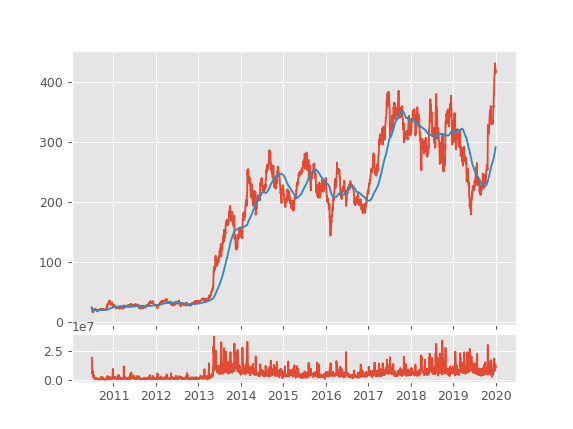

In [50]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 5, colspan = 1, sharex = ax1)

ax1.plot(data.index, data['Adj Close'])
ax1.plot(data.index, data['rolling'])
ax2.plot(data.index, data['Volume'])

### Creating an 'OCHL' Resamplaing

We don't HAVE to resample the volume data, but we should, since it would be too granular compared to our 10D pricing data. 

In [87]:
data_ohlc = data['Adj Close'].resample('10D').ohlc()
data_volume = data['Volume'].resample('10D').sum()

In [88]:
print(data_ohlc)

                  open        high         low       close
Date                                                      
2010-06-29   23.889999   23.889999   15.800000   17.459999
2010-07-09   17.400000   20.639999   17.049999   20.639999
2010-07-19   21.910000   21.910000   20.219999   20.719999
2010-07-29   20.350000   21.950001   19.590000   19.590000
2010-08-08   19.600000   19.600000   17.600000   19.150000
...                ...         ...         ...         ...
2019-11-19  359.519989  359.519989  328.920013  331.290009
2019-11-29  329.940002  336.200012  329.940002  335.890015
2019-12-09  339.529999  393.149994  339.529999  393.149994
2019-12-19  404.040009  430.940002  404.040009  430.380005
2019-12-29  414.700012  418.329987  414.700012  418.329987

[348 rows x 4 columns]


### Plot using matplotlib.finance 

First, we have to convert the dates (index) to a matplotlib dates format.

In [93]:
data_ohlc.reset_index(inplace = True)
data_ohlc['Date'] = data_ohlc['Date'].map(mdates.date2num)

In the first graph we use the candlestick, while in the second the volume

<IPython.core.display.Javascript object>


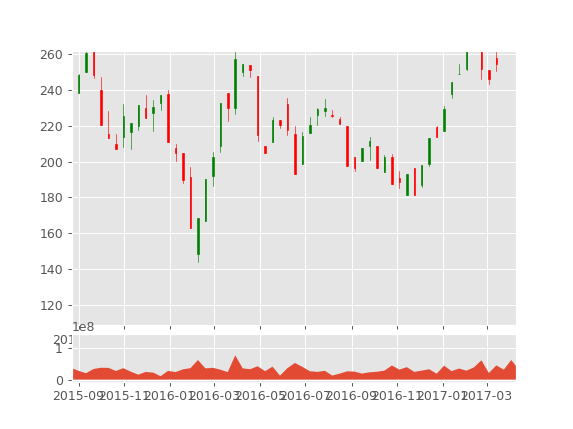

In [94]:
fig = plt.figure()
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 5, colspan = 1, sharex = ax1)

ax1.xaxis_date()
candlestick_ohlc(ax1, data_ohlc.values, width = 2, colorup = 'g', colordown='r')
ax2.fill_between(data_volume.index.map(mdates.date2num), data_volume.values, 0)
 

In [17]:
data_ohlc.reset_index(inplace = True)

In [18]:
data_ohlc

,index,Date,open,high,low,close
0,0,733952.0,23.889999,23.889999,15.800000,17.459999
1,1,733962.0,17.400000,20.639999,17.049999,20.639999
2,2,733972.0,21.910000,21.910000,20.219999,20.719999
3,3,733982.0,20.350000,21.950001,19.590000,19.590000
4,4,733992.0,19.600000,19.600000,17.600000,19.150000
...,...,...,...,...,...,...
343,343,737382.0,359.519989,359.519989,328.920013,331.290009
344,344,737392.0,329.940002,336.200012,329.940002,335.890015
345,345,737402.0,339.529999,393.149994,339.529999,393.149994
346,346,737412.0,404.040009,430.940002,404.040009,430.380005
